# We will load the necessary libraries that we need:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot') 
# this will apply the 'ggplots' style to the matplotlib plots in the notebook.

# We'll import the creditcard.csv data for preprocessing.

In [6]:
df = pd.read_csv("creditcard.csv")

In [7]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
# To protect the user's identity and the security of their confidential information, the dataset provider has applied Principal Component Analysis transformation on the original numerical features and compressed it into 28 principals components.
# Only two features have not been transformed: 1) time, and 2) amount.
# The feature class will be target column, with user labels as follows:

# 0: indicates non-fradulent
# 1: Fraudulent.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# The dataset only contains numerical features, and there are no instances of missing values. As a result, there is no requirement to handle null values in this dataset.

# Exploratory Data Analysis

In [12]:
#In the following stage, we will do fundamental Exploratory Data Analysis (EDA) on the dataset to improve our understanding and extract useful insights.


In [13]:
# before that we will set the default graph figsize property
plt.rcParams['figure.figsize']=[8,6]

In [14]:
Class = df['Class'].value_counts()
Class

Class
0    284315
1       492
Name: count, dtype: int64

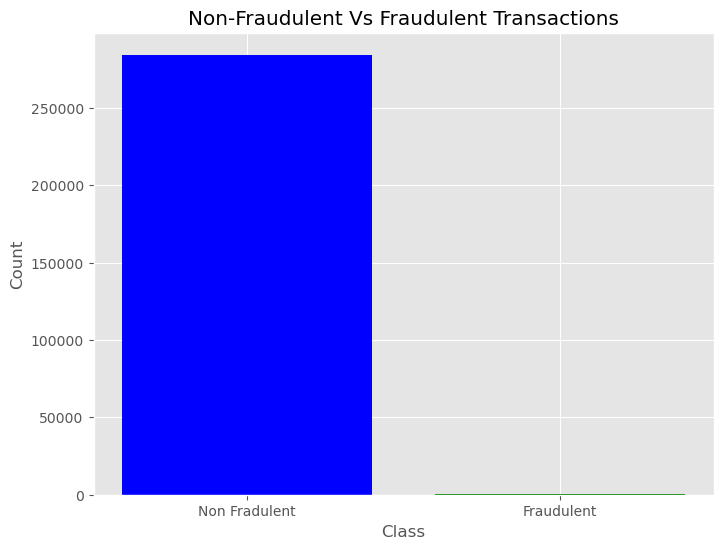

In [15]:
labels = ['Non Fradulent','Fraudulent']
plt.bar(labels, Class.values, color=['Blue','Green'])
plt.title("Non-Fraudulent Vs Fraudulent Transactions")
plt.xlabel('Class')
plt.ylabel('Count')
#save the above graph as PNG file
plt.savefig("Non-Fraudulent_Vs_Fraudulent_Transactions.png")
plt.show()

In [16]:
# The barplot shows a considerable imbalance between the classifications (0-Non Fraudulent) and (1-Fraudulent).

# The majority of features are in PCA format, with the exception of Time and Amount, which require further analysis.


In [17]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [18]:
# The feature we are most interested in is the "Amount". Here us the summary of the feature

In [19]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
# We will begin by visualizing the transaction counts by hour, using the complete dataset. Next, we will divide the dataset into fraudulent and non-fraudulent transactions to provide a clearer understanding.
# Now, we will analyze the frequency of each class label and display the results using matplotlib.

In [21]:
non_fraud = len(df[df.Class==0])
fraud = len(df[df.Class==1])
fraud_percentage = round((fraud/ (fraud+ non_fraud)) * 100, 2)

In [22]:
print("Number of Non-Fraudulent Transactions: ",non_fraud)
print("Number of Fraudulent Transactions: ", fraud)
print("Percentage of Fraudulent Transactions: ",fraud_percentage)

Number of Non-Fraudulent Transactions:  284315
Number of Fraudulent Transactions:  492
Percentage of Fraudulent Transactions:  0.17


In [23]:
# It's evident that authentic transactions account for more than 99%.
# We plan to implement scaling methods on the "Amount" feature to adjust the value range. 
# We will eliminate the original "Amount" column and incorporate a new column containing the scaled values. Additionally, we will remove the "Time" columns since they are not relevant.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [25]:
df.drop(columns=['Amount','Time'], inplace=True ,axis=1)

Y = df['Class']
X = df.drop(['Class'], axis=1)

In [26]:
# We will now divide the credit card data using a 70-30 ratio through the train_test_split() function.
# The train_test_split() method in scikit-learn is an effective tool for partitioning a dataset into training and testing components.
# Parameters
# X: Feature matrix
# Y: Target variable
#test_size: Proportion of the dataset to include in the test split. Here we have set the test_size as 0.3 means 30% of the data we take as testing data set.
#random_state: we have set the seed for random number generation, to ensure the reproducibility

In [27]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X,Y, test_size=0.3, random_state=42)

In [28]:
print("Shape of the training dataset train_X: ", train_X.shape)
print("Shape of the testing dataset test_X: ", test_X.shape)

Shape of the training dataset train_X:  (199364, 29)
Shape of the testing dataset test_X:  (85443, 29)


# Implementing a machine learning algorithm on a credit card dataset.

In [29]:
# We will evaluate several machine learning algorithms to identify the best model for our binary classification task.

# The goal is to predict one of two possible class labels. We aim to assess the performance of various algorithms, including Random Forest and Decision Tree, to determine the most appropriate solution for our problem.

# Our strategy includes building Random Forest and Decision Tree classifiers to pinpoint the most effective model.

# Decision Tree Algorithm

In [30]:
# The Decision Tree algorithm is a supervised machine learning method used for both classification and regression tasks. Its goal is to build a model that can predict the value of a target class variable. 
# This is done by learning simple if-then-else decision rules based on patterns found in the training data.

# Random Forest Algorithm

In [31]:
# Random Forest is a supervised machine learning algorithm that builds a "forest" by combining an ensemble of "decision trees," usually trained through the "bagging" method.

# The fundamental idea behind bagging is that combining various models improves performance. Random Forest generates multiple decision trees and merges their predictions to achieve more accurate and consistent results.

# Model Training and Evaluation on the Dataset

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

In [34]:
# In this case, we are constructing a RandomForestClassifier with 100 trees in the forest. While a larger number of trees typically enhances performance, it may also result in longer training times.

In [35]:
# Decision Tree Classifier
decision_tree.fit(train_X, train_Y)
predictions_data = decision_tree.predict(test_X)

In [36]:
# Next, we will evaluate the performance of the Decision Tree model.

In [37]:
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

# Printing the score of the classifier
print("Decision Tree Score is: ", decision_tree_score)

Decision Tree Score is:  99.91924440855307


In [38]:
# Random Forest

In [39]:
random_forest.fit(train_X, train_Y)
predictions_data_rf = random_forest.predict(test_X)

In [40]:
random_forest_score = random_forest.score(test_X, test_Y) * 100


In [41]:
# Printing the score of the Random Forest Classifiers

In [42]:
print("Random Forest Score is: ", random_forest_score)

Random Forest Score is:  99.96605924417447


In [43]:
# Printing the scores of the both classifiers
print("Decision Tree: ", round((decision_tree_score),4))
print("Random Forest: ", round((random_forest_score),4))

Decision Tree:  99.9192
Random Forest:  99.9661


In [44]:
#The Random Forest classifier generally outperforms the Decision Tree classifier by a small margin.

# Evaluation Metrics

In [45]:
# We will define a function to display the metrics.

1.Accuracy_score
2.Precision_score
3.Confusion_matrix
4.Recall_score
5.F-1 score

In [46]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

# Evaluation Matrics of Decision Tree Model And Random Forest

In [47]:
print("Evaluation of Decision Tree Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_data),4))
print("Precision:",round(precision_score(test_Y,predictions_data),4))
print("recall_score:",round(recall_score(test_Y,predictions_data),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data),4))

Evaluation of Decision Tree Model: 
Accuracy: 0.9992
Precision: 0.7161
recall_score: 0.8162
F1-Score: 0.7629


In [48]:
print("Evaluation of Random Forest Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_data_rf),4))
print("Precision:",round(precision_score(test_Y,predictions_data_rf),4))
print("recall_score:",round(recall_score(test_Y,predictions_data_rf),4))
print("F1-Score:",round(f1_score(test_Y,predictions_data_rf),4))

Evaluation of Random Forest Model: 
Accuracy: 0.9997
Precision: 0.9496
recall_score: 0.8309
F1-Score: 0.8863


In [49]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_data.round())
print("   CM   -  DT") # CM = Confusion matrix and DT = Decision tree
print(confusion_matrix_dt)

   CM   -  DT
[[85263    44]
 [   25   111]]


In [50]:
# We will visualize the confusion matrix.

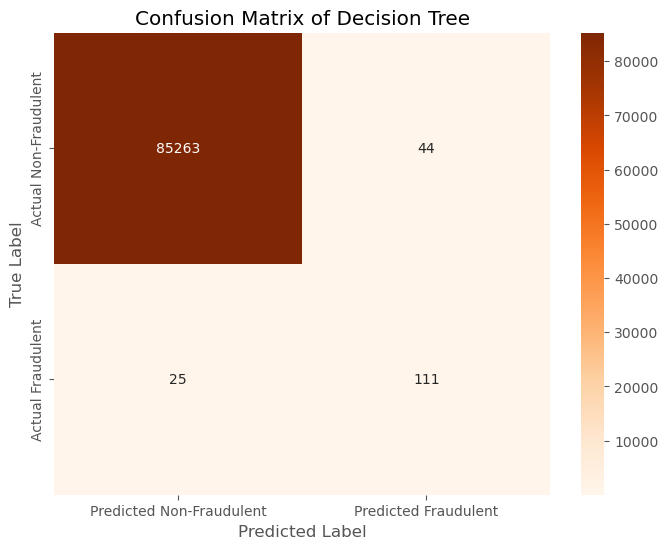

In [51]:
# we will plot the confusion matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_dt, annot=True , fmt='d' , cmap="Oranges",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix of Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_of_Decision_Tree.png")
plt.show()

# 0 - non fraudulent
# 1 - fradulent

In [52]:
# We can interpret the information from the confusion matrix as follows:

Non-Fraudulent transactions:

1. A total of 85263 transactions were correctly identified as non-fraudulent (True Negative).
2. 44 transactions were incorrectly flagged as fraudulent (False Positive).

Fraudulent transactions:

1. A total of 25 transactions were incorrectly identified as non-fraudulent (False Negative)
2. 111 transactions were correctly identified as fraudulent (True Positive).

In [53]:
# In-short summary:

1 85263 transactions were correctly labeled as non-fraudulent.
2 111 transactions were accurately identified as fraudulent.
3 44 transactions were incorrectly flagged as fraudulent.
4 25 transactions were wrongly categorized as non-fraudulent.

# Confusion Matrix of Random Forest model

In [54]:
# Confusion Matrix
confusion_matrix_rf = confusion_matrix(test_Y,predictions_data_rf.round())
print("   CM   -  RF") # CM = Confusion matrix and RF = RandomForest
print(confusion_matrix_rf)

   CM   -  RF
[[85301     6]
 [   23   113]]


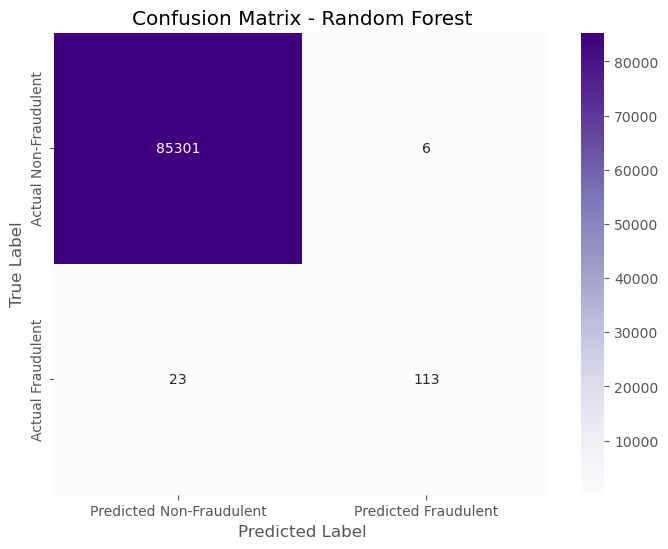

In [55]:
# we will plot the consfusion matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf, annot=True , fmt='d' , cmap="Purples",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_of_Random_Forest.png")
plt.show()

# 0 - non fraudulent
# 1 - fradulent

In [56]:
# We can interpret the information from the confusion matrix as follows:

Non-Fraudulent transactions:

1. A total of 85301 transactions were correctly identified as non-fraudulent (True Negative).
2. 6 transactions were incorrectly flagged as fraudulent (False Positive).

Fraudulent transactions:

1. A total of 23 transactions were incorrectly identified as non-fraudulent (False Negative)
2. 113 transactions were correctly identified as fraudulent (True Positive).
 
# In-short summary:
1. 85301 transactions were correctly labeled as non-fraudulent.
2. 113 transactions were accurately identified as fraudulent.
3. 23 transactions were incorrectly flagged as fraudulent.
4. 6 transactions were wrongly categorized as non-fraudulent.

Class-Imbalance

1. The Random Forest model performs better than Decision Trees, particularly with class imbalance, where legitimate transactions are over 99% and fraud is only 0.17%.  
2. Training without addressing the imbalance may lead to biased predictions.  
3. Although the model may show high accuracy, it may struggle to capture fraud cases effectively.  
4. Oversampling is one technique to address the class imbalance issue.

In [57]:
# we will use the SMOT (Synthetic Minority Oversampling Technique, or SMOTE)
# It is the method of data augumentation for the minority class.

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X,Y)

print("Resampled shape of X: ",X_resampled.shape)
print("Resampled shape of Y: ",Y_resampled.shape)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)


In [58]:
from collections import Counter
value_counts = Counter(Y_resampled)
print(value_counts)

Counter({0: 284315, 1: 284315})


In [59]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [60]:
rf_resampled = RandomForestClassifier(n_estimators=100)
rf_resampled.fit(train_X, train_Y)

RandomForestClassifier()

In a Jupyter environment, please rerun this cell to view the HTML representation, or alternatively, trust the notebook.
On GitHub, the HTML view may not render properly. To view it correctly, try opening the page in [nbviewer.org](https://nbviewer.org).

Since the Random Forest algorithm performed better than the Decision Tree algorithm, we will now use the Random Forest algorithm on our resampled data.

In [62]:
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [63]:
print(random_forest_score_resampled)

99.98886211889395


# Evaluation Metrics and Confusion matrix

In [64]:
print("Evaluation of Resampled Random Forest Model: ")

print("Accuracy:",round(accuracy_score(test_Y,predictions_resampled),4))
print("Precision:",round(precision_score(test_Y,predictions_resampled),4))
print("recall_score:",round(recall_score(test_Y,predictions_resampled),4))
print("F1-Score:",round(f1_score(test_Y,predictions_resampled),4))

Evaluation of Resampled Random Forest Model: 
Accuracy: 0.9999
Precision: 0.9998
recall_score: 1.0
F1-Score: 0.9999


Our model has shown a substantial performance improvement over the previous Random Forest classifier that did not utilize oversampling. By implementing methods to address class imbalance, we achieved an accuracy rate of over 99%.

In [66]:
# Confusion Matrix
confusion_matrix_rf_resampled= confusion_matrix(test_Y,predictions_resampled.round())
print("   CM   -  RF") # CM = Confusion matrix and RF = RandomForest
print(confusion_matrix_rf_resampled)

   CM   -  RF
[[85130    19]
 [    0 85440]]


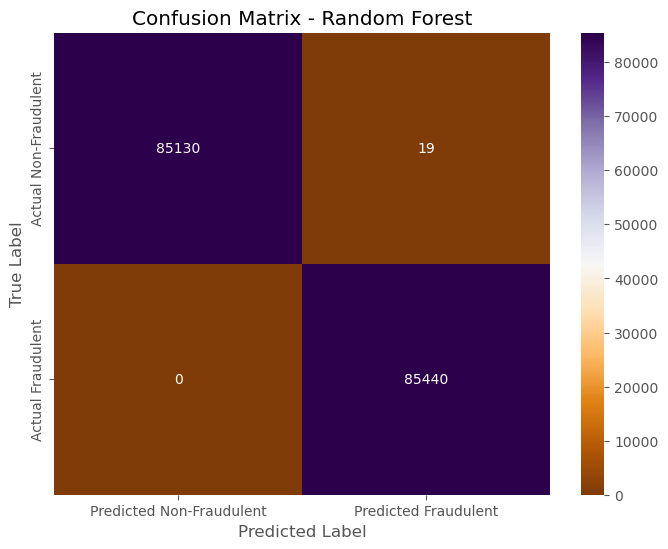

In [67]:
# Confusion Matrix
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix_rf_resampled, annot=True , fmt='d' , cmap="PuOr",
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
            yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_of_Random_Forest_for_resampled_data.png")
plt.show()

From the confusion matrix, we observe the following:

- The model correctly identified 85440 fraudulent transactions.
- It did not incorrectly classify any fraudulent transactions as non-fraudulent.
- It accurately predicted 85130 non-fraudulent transactions.
- It incorrectly labeled 19 non-fraudulent transactions as fraudulent.

As part of our future plans for model deployment, we will utilize the `pickle` library to save both the dataframe and the model.

In [70]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf_resampled,open('rf_resampled.pkl','wb'))